# Developing AI tools - Supervised Classification

The second module of our **AI4Business** course describes how to develop AI solutions that generate value.
This tutorial details the practical AI development process with a **supervised classification** example in Python.
The Data Science Life Cycle consists of the following five steps:
1. Business Understanding
2. Data Preparation & Understanding
3. Modeling
4. Deployment
5. Monitoring

In this tutorial we put focus on the first three steps, as indicated in the figure below. The deployment and monitoring steps are discussed in detail in modules four and five of the course.

![lifecycle](img/Lifecycle.png)

## 1. Business Understanding

Every AI project should start from a **business opportunity** to create value. Imagine that we are a cruise line company, operating a fleet of ships with which we market cruises to the general public. Unfortunately, cruise ships sometimes run into troubles that can turn into disasters. Remember for example the Costa Concordia that ran aground, capsized and sank after hitting a rock in 2012.

We are currently offering catastrophe insurance coverage to our passengers as an extra option during booking. The price for this add-on is however fixed at the same rate for everyone. We are now wondering whether this is the right strategy or whether we can diversify this price based on personal characteristics. Taking a very morbid approach, we decide to distinguish the insurance price based on the probability that someone survives a catastrophe.

Our goal, stated as a prediction task, is therefore the following: **in case of a cruise disaster, predict the survival probability of passengers based on their personal characteristics**. This allows us to spot whether price diversification would make sense or not, and how to diversify.

![cruiseship](img/Cruiseship.jpg)

## 2. Data Preparation & Understanding

After defining our business problem, we are ready to start working towards a solution. The first important step is to obtain, prepare and understand **data** that is relevant to solve our problem. We therefore need information from a cruise catastrophe that contains personal passenger information and whether they survived the disaster or not. The most famous cruise ship disaster in history is the sinking of the **Titanic**, so let's start from there. 

### Obtaining data

The first step is to actually find relevant data. The [PyDataset](https://github.com/iamaziz/PyDataset) package provides instant access to several datasets within Python. Luckily for us, there is a dataset available with information on the Titanic disaster in this package. The following steps are executed to obtain the data:
1. Import the data() function from the pydataset package
2. Use this function as data('titanic') to load the titanic data

We save the dataset in an object called *titanic*.

In [1]:
# Load the titanic dataset
from pydataset import data
titanic = data('titanic')

That went smooth and fast! Now that we have the data, we can have a first look at it by inspecting the *titanic* object.

In [2]:
# Inspect the titanic data
print(titanic)

          class     age    sex survived
1     1st class  adults    man      yes
2     1st class  adults    man      yes
3     1st class  adults    man      yes
4     1st class  adults    man      yes
5     1st class  adults    man      yes
...         ...     ...    ...      ...
1312  3rd class   child  women       no
1313  3rd class   child  women       no
1314  3rd class   child  women       no
1315  3rd class   child  women       no
1316  3rd class   child  women       no

[1316 rows x 4 columns]


This first inspection teaches us that the data contains 1316 observations (rows) with four characteristics (columns): class, age, sex and survived. We can already guess what these mean, but let's have a closer look at them anyway.

### Inspect the data

We first want to know the number of unique values that each of the columns contains. The output below indicates that *class* contains three unique values, while the other three (*age*, *sex* and *survived*) contain two unique values.

In [3]:
# Get the number of unique values via the .nunique() method
print(titanic.nunique())

class       3
age         2
sex         2
survived    2
dtype: int64


Knowing this, we would like to figure out what these unique values actually represent. The output below shows the unique values for each of the columns.

In [4]:
# Get the unique values via the .unique() method
for x in titanic.columns:
    print(x,":",titanic[x].unique())

class : ['1st class' '2nd class' '3rd class']
age : ['adults' 'child']
sex : ['man' 'women']
survived : ['yes' 'no']


In summary, this first inspection teaches us that the data frame has 1316 rows and 4 columns regarding the survival of passengers on the Titanic with the following information on each passenger:
- **class**: the class in which the passenger was staying (1st, 2nd or 3rd)
- **age**: the age group of the passenger (adult or child).
- **sex**: the gender of the passenger (women or man).
- **survived**: indicator whether the passenger survived (yes or no).

Now we have to ask ourself the following question: **Is this data relevant to solve our business problem?** Remember that the business goal is to predict the survival probability of passengers based on their personal characteristics. We have an indicator whether a passenger survived the Titanic disaster, so **survived** is therefore our **target** to model and predict. We have three personal characteristics (**class**, **age**, and **sex**) that we can use to predict the target, so these are our **features**. It seems that this is a good dataset to start from with relevant information for our business problem.

### Quality check

Before continuing it is also very important to check the **quality** of our data. Useful features and target is one thing, but if they have a lot of missing or wrong values then they are not that valuable. Below we calculate the number of missing values for each column in our data, which is apparently equal to zero!

In [5]:
# Get the number of missing values per column
print(titanic.isnull().sum())

class       0
age         0
sex         0
survived    0
dtype: int64


Relevant and high-quality data, that's great! Let's gain some insights in the data then.

### Univariate exploration

A first interesting insight to learn is the distribution of the different columns. Frequency tables count the number of occurrences for each of the unique values in a column. Below we show the frequency table for each of the columns in the titanic data. There were for example 706 passengers in 3rd class, 325 in 1st class and 285 in 2nd class. Most passengers were adults (1207 adults versus 109 children) and most were males (869 males versus 447 females). We furthermore observe that only 499 passengers survived while 817 did not, showing the tragedy of the Titanic's sinking.

In [6]:
# Get frequency tables via the .value_counts() method
for x in titanic.columns:
    print(x, ':\n', titanic[x].value_counts(), end = "\n\n", sep='')

class:
3rd class    706
1st class    325
2nd class    285
Name: class, dtype: int64

age:
adults    1207
child      109
Name: age, dtype: int64

sex:
man      869
women    447
Name: sex, dtype: int64

survived:
no     817
yes    499
Name: survived, dtype: int64



Tables are interesting, but graphs are more interesting. Let's therefore show the same information with some charts. For this we use the very popular [pyplot](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) module from the [matplotlib](https://matplotlib.org) package in Python.

In [7]:
# Import 'pyplot' module from 'matplotlib' package
import matplotlib.pyplot as plt

The (somewhat complicated) code below creates pie charts showing the relative proportion of values for the target and all features. This shows the same information as our tables, but in a much more intuitive and interpretable way.

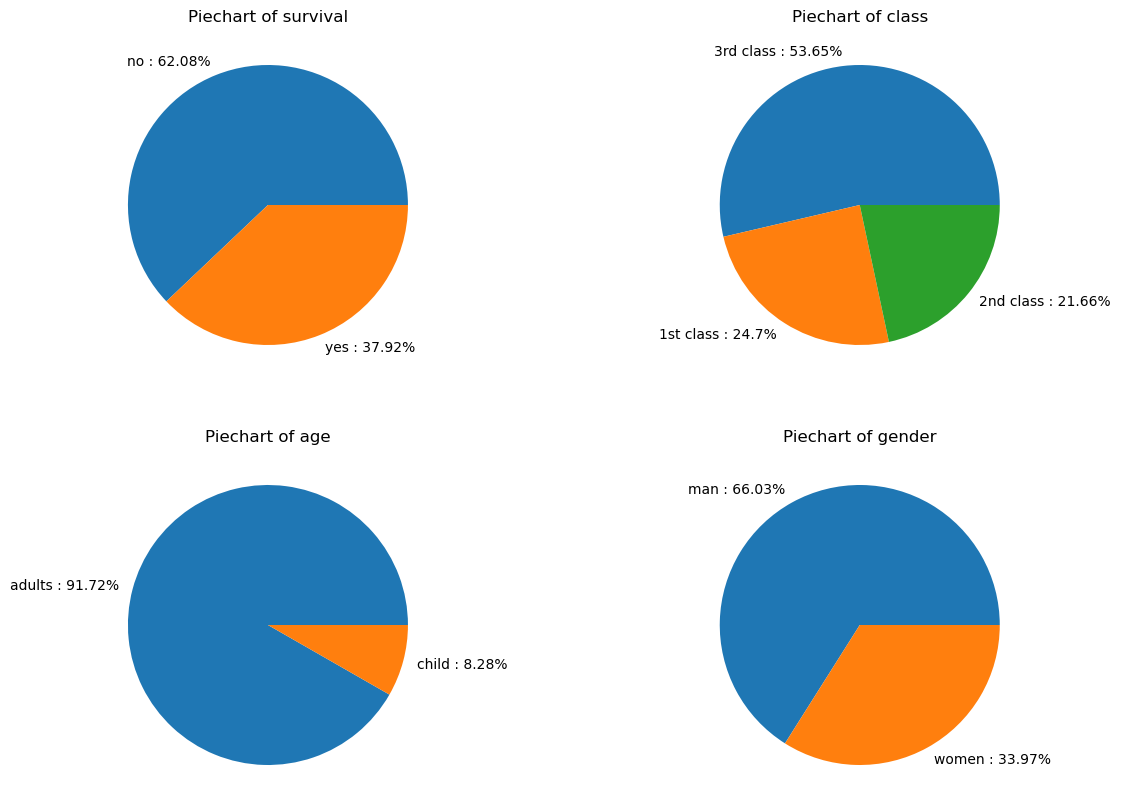

In [8]:
# Plot pie charts for visual inspection
plt.figure(figsize=(14, 10))
# Plot a pie chart for the target 'survived'
plt.subplot(2, 2, 1)
ftable_survived = titanic.survived.value_counts(normalize = True)
plt.pie(ftable_survived.values, 
        labels = [i + ' : ' + j + '%' for i, j in zip(ftable_survived.index, [str(100*round(x,4)) for x in ftable_survived.values])])
plt.title('Piechart of survival')
# Plot a pie chart for the feature 'class'
plt.subplot(2, 2, 2)
ftable_class = titanic["class"].value_counts(normalize = True)
plt.pie(ftable_class.values,
        labels = [i + ' : ' + j + '%' for i, j in zip(ftable_class.index, [str(100*round(x,4)) for x in ftable_class.values])])
plt.title('Piechart of class')
# Plot a pie chart for the target 'age'
plt.subplot(2, 2, 3)
ftable_age = titanic.age.value_counts(normalize = True)
plt.pie(ftable_age.values, 
        labels = [i + ' : ' + j + '%' for i, j in zip(ftable_age.index, [str(100*round(x,4)) for x in ftable_age.values])])
plt.title('Piechart of age')
# Plot a pie chart for the feature 'sex'
plt.subplot(2, 2, 4)
ftable_sex = titanic.sex.value_counts(normalize = True)
plt.pie(ftable_sex.values,
        labels = [i + ' : ' + j + '%' for i, j in zip(ftable_sex.index, [str(100*round(x,4)) for x in ftable_sex.values])])
plt.title('Piechart of gender')
# Show the plot
plt.show()

### Multivariate exploration

So far we focused on univariate exploration of the data, which means only considering one column at a time. It can also be interesting to look at multiple columns simultaneously in a multivariate way. The very popular [pandas](https://pandas.pydata.org) package for data analysis in Python comes in handy here.

In [9]:
# Import the 'pandas' package
import pandas as pd

Below we calculate a two-dimensional frequency table by making use of the crosstab() function from pandas. This table shows the observation counts for the unique combinations between the age and gender of a passenger. There were for example 805 male adults, 402 female adults, 64 male children and 45 female children on board of the Titanic. This shows that for adults there were about double the amount of males compared to females, while this difference was much lower for the children. The "All" columns show the univariate frequency tables that we saw before.

In [10]:
# Get a 2D frequency table via the crosstab() function in the pandas package
print(pd.crosstab(index = titanic.sex,
            columns = titanic.age,
            margins = True))

age    adults  child   All
sex                       
man       805     64   869
women     402     45   447
All      1207    109  1316


This information can also be shown in a visual way, which is more appealing to the human eye. Below we show a grouped bar plot for the combination of class and gender.This indicates that the difference in male versus female passengers was much smaller in first class than in third class.

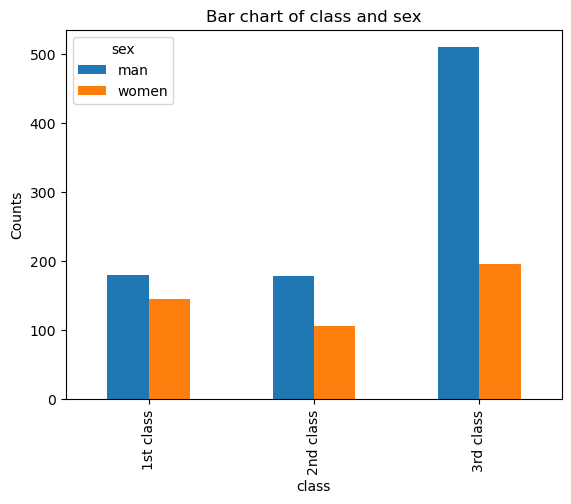

In [11]:
# Plot a grouped bar chart for features 'class' and 'sex'
pd.crosstab(index = titanic["class"],
            columns = titanic.sex,
            margins = False).plot.bar()
plt.title('Bar chart of class and sex')
plt.ylabel('Counts')
plt.show()

### Empirical relation of the features to the target

So far we focused on the exploration of the target and features. What is really interesting is to discover the empirical relation between the features and the target. This is the pattern that you want to capture in an ML model, so let's have a look!

The target is a binary value ("yes"/"no") indicating survival. The proportion of "yes" over the whole data therefore measures the overall survival probability without differentiating among passengers. Survival probability appears to be only 37.92% on average. But we already knew this from before, remember?

In [12]:
# Calculate overall survival probability
print(round(sum(titanic.survived == 'yes') / len(titanic.survived), 4))

0.3792


We can however imagine that this survival probability is not the same for everyone in the data. Maybe the class that a passenger was located in plays a role? In order to check this, we divide the data based on the value of "class". Within each of the data parts (1st, 2nd and 3rd class) we calculate the proportion of "yes" values for survival. This shows that someone in first class had 62.46% of surviving, while this is only 25.21% for people in third class.

In [13]:
# Survival probability per class
survived_class = titanic.groupby("class").survived.apply(lambda x: (x == 'yes').mean())
print(survived_class)

class
1st class    0.624615
2nd class    0.414035
3rd class    0.252125
Name: survived, dtype: float64


The graph below clearly indicated that survival chances increased for the higher classes.

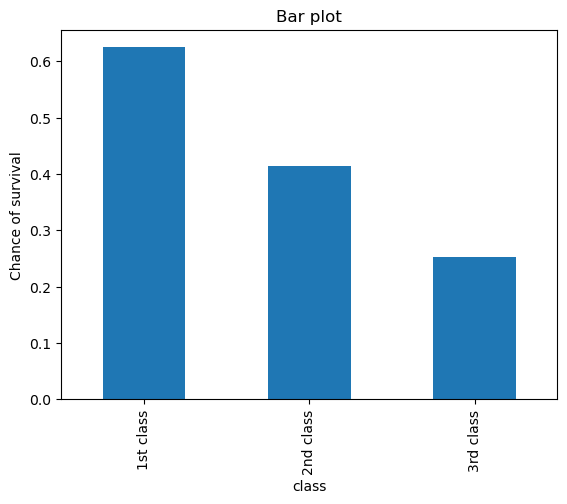

In [14]:
# Bar plot for survival probability per class
survived_class.plot.bar()
plt.title('Bar plot')
plt.ylabel('Chance of survival')
plt.show()

We can also look at this in more dimensions. Let's calculate the survival probability based on the combination of age and gender. The table below indicates for example that female adults had a survival probability of 73.63% and male children had 45.31% of surviving.

In [15]:
# Survival probability per age and gender
survived_age_sex = titanic.groupby(["age","sex"]).survived.apply(lambda x: (x == "yes").mean())
print(survived_age_sex)

age     sex  
adults  man      0.181366
        women    0.736318
child   man      0.453125
        women    0.622222
Name: survived, dtype: float64


We visualize these numbers in the graph below, which shows already an interesting observation. For females the survival probability is higher as adult, while for males the survival chances were higher as child. Always be careful with interpretations from such observations as there might be other effects at play not shown in this graph (for example the effect of the class in our example).

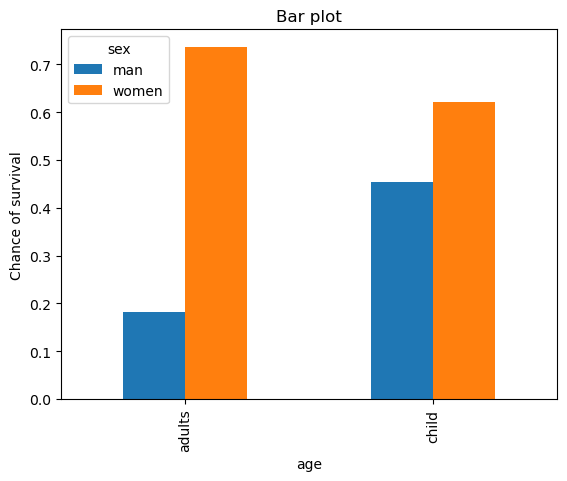

In [16]:
# Bar plot for survival probability per age and gender
survived_age_sex.unstack().plot(kind = "bar")
plt.title('Bar plot')
plt.ylabel('Chance of survival')
plt.show()

But that's enough on the data itself. We have a good understanding of the dataset and can now move on to the modeling playground!

## 3. Modeling

Okay hold up, maybe we are not completely done with the data yet. Some preparation for our modeling phase is still necessary.

### Target and features

We first separate the target and features. The target is stored in the object *y*. This is a vector (pandas Series) of length 1316. The features are stored in object *X*. This is a matrix (pandas DataFrame) with 1316 rows and 3 columns, one for each feature.

In [17]:
# Extract target vector y from the data
y = titanic.survived
print(type(y))
print(y.shape)
print('\nSample:')
print(y.head())

<class 'pandas.core.series.Series'>
(1316,)

Sample:
1    yes
2    yes
3    yes
4    yes
5    yes
Name: survived, dtype: object


In [18]:
# Extract feature matrix X from the data
features = list(set(titanic.columns) - set(['survived']))
X = titanic[features]
print(type(X))
print(X.shape)
print('\nSample:')
print(X.head())

<class 'pandas.core.frame.DataFrame'>
(1316, 3)

Sample:
       class  sex     age
1  1st class  man  adults
2  1st class  man  adults
3  1st class  man  adults
4  1st class  man  adults
5  1st class  man  adults


Are we now ready to model? One more thing... Remember that ML models need numeric data to work with? The samples of target/features observations above show that this is not the case yet. ML models don't know how to interpret 'yes', '1st class', 'adults', or 'man'. Transforming this information into a usable format is the process of feature engineering.

### Feature engineering

We start with the target vector *y*. In supervised binary classification problems, i is customary to indicate the positive class that you want to predict as 1 and the negative class as 0. In our survival example this means transforming 'yes' to 1 and 'no' to 0. We save the result in the object *y_integer*.

In [19]:
# Transform the target to a numeric format
y_integer = y.replace(('yes', 'no'), (1, 0), inplace = False)
print("Original:")
print(y.iloc[[1,5,789,1205,1310]])
print("\nTransformed:")
print(y_integer.iloc[[1,5,789,1205,1310]])

Original:
2       yes
6       yes
790      no
1206     no
1311     no
Name: survived, dtype: object

Transformed:
2       1
6       1
790     0
1206    0
1311    0
Name: survived, dtype: int64


For the features we can take multiple routes. Remember the different feature types that we discussed in the first module. Our three features are all qualitative for sure, with both 'age' and 'sex' in a nominal format. There is no ordering between child/adult or male/female. We therefore perform **one-hot encoding** for these two features. For the 'class' feature we can however argue that this is of an ordered type as 1st class > 2nd class > third class. In that case we can transform 'class' to a **numeric** vector without one-hot encoding. We demonstrate both approaches for the 'class' feature.

![features](img/Featuretypes.png)

We first illustrate the case where we represent 'class' as a nominal feature, just like 'age' and 'sex'. We therefore perform one-hot encoding for all features via the get_dummies() function from pandas and save the result in the object *X_dummy*. Notice how 'class' is now represented by two columns 'class_2nd class' and 'class_3rd class'. When 'class_2nd class' equals 1, then class equals 2nd class. When 'class_3rd class' equals 1, then class equals 3rd class. When both are equal to 0, then class equals 1st class. This shows how you need m-1 columns to represent a nominal feature of m levels. Similar arguments hold for 'age' and 'sex', which each only need one columns to represent the two possible levels. For example, 'age_child' = 0 means that 'age' = adult and 'sex_women' = 1 means that 'sex' = woman.

In [20]:
# Dummify all the features
X_dummy = pd.get_dummies(X, drop_first = True)
print("Original:")
print(X.iloc[[1,352,789,1205,1310]])
print("\nTransformed:")
print(X_dummy.iloc[[1,352,789,1205,1310]])

Original:
          class    sex     age
2     1st class    man  adults
353   2nd class    man  adults
790   3rd class    man  adults
1206  3rd class  women  adults
1311  3rd class  women   child

Transformed:
      class_2nd class  class_3rd class  sex_women  age_child
2                   0                0          0          0
353                 1                0          0          0
790                 0                1          0          0
1206                0                1          1          0
1311                0                1          1          1


We now follow the same strategy for 'age' and 'sex' while representing 'class' as an ordered feature. For this we simply transform '1st class' to the numeric value 1, '2nd class' to 2 and '3rd class' to the numeric value 3. We now only need one column to represent the three class values instead of two.

In [21]:
# Dummify the features 'age' and 'sex' but keep 'class' as ordered
X_order = pd.get_dummies(X[["age", "sex"]], drop_first = True)
X_order["class"] = X["class"].replace(('1st class', '2nd class', '3rd class'), (1, 2, 3), inplace = False)
print("Original:")
print(X.iloc[[1,352,789,1205,1310]])
print("\nTransformed:")
print(X_order.iloc[[1,352,789,1205,1310]])

Original:
          class    sex     age
2     1st class    man  adults
353   2nd class    man  adults
790   3rd class    man  adults
1206  3rd class  women  adults
1311  3rd class  women   child

Transformed:
      age_child  sex_women  class
2             0          0      1
353           0          0      2
790           0          0      3
1206          0          1      3
1311          1          1      3


Now all data is in a numeric format, ready to be used by your favorite ML model!

### Data splitting

Before fitting ML models, we split the full dataset in **train** and **test** data. The train data is used to train the ML model while the test data is used to evaluate the model's performance. A very popular package for ML in Python is [scikit-learn](https://scikit-learn.org/stable/). The 'model_selection' module contains a train_test_split() function to make life easy for us. We keep 70% of the data for training while using 30% of the data for evaluation later on. We also keep the target's 0/1 proportion equal in the train and test set via stratification. Don't mind this technical term, but keeping those proportions is important to allow for representative training and fair evaluation. Train data is indicated via '\_train' and test data via '\_test'.

In [22]:
# Perform a train-test plit on the data
# Import the numpy package
import numpy as np
# Import 'model_selection' module from 'sklearn' package
from sklearn import model_selection as ms
# Use the train_test_split() function to split the data
Xo_train, Xo_test, Xd_train, Xd_test, y_train, y_test = ms.train_test_split(X_order, X_dummy, y_integer,
                                                                            test_size = 0.3,
                                                                            random_state = 5678,
                                                                            stratify = y)

Below we show how the test data contains 395 observations (equal to 30% of the data), while the train data contains 921 observations.

In [23]:
# Compare dataset sizes
# Expected number of observations in test set
print('30% of the data:', round(len(y) * 0.3))
# Number of obevations in test set
print('test observations:', len(y_test))
#Number of observations in training set
print('train observations:', len(y_train))

30% of the data: 395
test observations: 395
train observations: 921


The graph below shows that stratification actually worked. The proportion of 1's for the survival indicator is equal in the train (blue) and test (red) set. The same observation holds for the proportion of 0-values for the survival indicator.

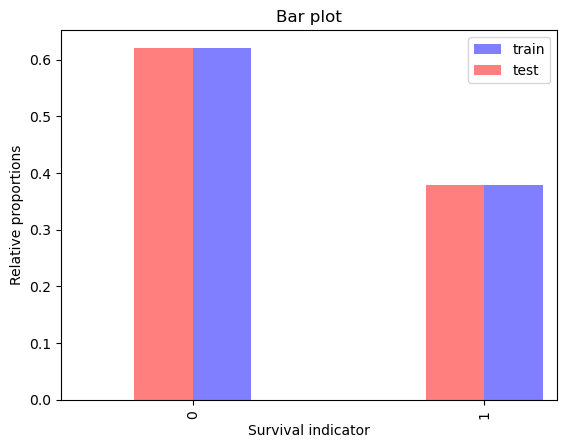

In [24]:
# Stratification check
y_train.value_counts(normalize = True).plot.bar(label = 'train', position = 0, color = 'blue', alpha = 0.5, width = 0.2)
y_test.value_counts(normalize = True).plot.bar(label = 'test', position = 1, color = 'red',alpha = 0.5, width = 0.2)
plt.title('Bar plot')
plt.xlabel('Survival indicator')
plt.ylabel('Relative proportions')
plt.legend(loc = 'upper right')
plt.show()

We now have train and test data that can be interpreted by ML models, so let's start modeling!

### Baseline logistic regression model

We start by fitting a logistic regression model as baseline. Logistic regression is a classical statistics approach to model a binary dependent variable such as our survival indicator. We will make use of the [statsmodels](https://www.statsmodels.org/stable/index.html), a popular Python package for statistical modeling. We fit the Logit model to the training targets (*y_train*) by making use of the training feature matrix in dummy format (*Xd_train*).

In [25]:
# Fit a logistic regression model
# Import 'statsmodels.api'
import statsmodels.api as sm
# Fit the Logit model
log_reg = sm.Logit(y_train, sm.add_constant(Xd_train)).fit()

Optimization terminated successfully.
         Current function value: 0.490136
         Iterations 6


After the successful model fitting, we can inspect the summary results of our regression model. A lot of information is shown, but the the coefficients for each feature are the most interesting to look at. These coefficients allow to exactly calculate the predicted survival probability for each passenger profile.

In [26]:
# Inspect the regression results
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  921
Model:                          Logit   Df Residuals:                      916
Method:                           MLE   Df Model:                            4
Date:                Thu, 12 Aug 2021   Pseudo R-squ.:                  0.2613
Time:                        15:13:45   Log-Likelihood:                -451.42
converged:                       True   LL-Null:                       -611.12
Covariance Type:            nonrobust   LLR p-value:                 7.024e-68
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3997      0.161     -2.484      0.013      -0.715      -0.084
class_2nd class    -0.8832      0.231     -3.824      0.000      -1.336      -0.431
class_3rd class    -1.7757      0.202     -8.786      0.000      -2.172      -1.380
sex_women           2.3092      0.172     13.405      0.000       1.972       2.647
age_child           1.0708      0.274      3.908      0.000       0.534       1.608
===================================================================================
"""

We won't go into details of the logistic regression model structure, but focus on the interpretation of the obtained results. Below we explicitly calculate the survival probability for some profiles based on the coefficients.

In [27]:
# Explicit calculation of survival probability via coefficients
print('Survival probability of male adult in 1st class:', np.exp(-0.3997) / (1 + np.exp(-0.3997)))
print('Survival probability of male child in 1st class:', np.exp(-0.3997 + 1.0708) / (1 + np.exp(-0.3997 + 1.0708)))
print('Survival probability of female adult in 1st class:', np.exp(-0.3997 + 2.3092) / (1 + np.exp(-0.3997 + 2.3092)))
print('Survival probability of male adult in 3rd class:', np.exp(-0.3997 - 1.7757) / (1 + np.exp(-0.3997 - 1.7757)))
print('Survival probability of female adult in 2nd class:', np.exp(-0.3997 + 2.3092 - 0.8832) / (1 + np.exp(-0.3997 + 2.3092 - 0.8832)))

Survival probability of male adult in 1st class: 0.4013844202447624
Survival probability of male child in 1st class: 0.6617494238308781
Survival probability of female adult in 1st class: 0.8709629650365214
Survival probability of male adult in 3rd class: 0.10198143086907543
Survival probability of female adult in 2nd class: 0.7361979451292101


It is however more convenient to use prediction functions in Python that directly give the survival probability for input profiles. Below we observe that female children in 1st class have the highest survival probability of 95%, followed by female children in 2nd class with 89%. Male adults in 3rd class have the lowest survival probability of only 10%, followed by male adults in 2nd class with 22% chance of surviving.

In [28]:
# Automatic calculation of survival probability via predict
log_reg_preds = Xd_train.drop_duplicates()
log_reg_preds.insert(4, 'predict', log_reg.predict(exog = sm.add_constant(log_reg_preds)), True)
log_reg_preds.sort_values('predict', ascending = False)

,class_2nd class,class_3rd class,sex_women,age_child,predict
325,0,0,1,1,0.951676
603,1,0,1,1,0.890624
287,0,0,1,0,0.870967
1294,0,1,1,1,0.769349
556,1,0,1,0,0.736210
324,0,0,0,1,0.661745
1164,0,1,1,0,0.533417
592,1,0,0,1,0.447174
50,0,0,0,0,0.401387
1274,0,1,0,1,0.248881


### Simple regression tree

We now fit a simple decision tree to illustrate the model structure of a tree model. For this we use the decision tree classifier from scikit-learn to model the training targets (*y_train*) based on the training feature matrix (*Xo_train*). We use a maximum tree depth equal to two to keep results intuitive and transparent.

In [29]:
# Fit a simple decicion tree
# Import 'DecisionTreeClassifier' from 'sklearn.tree'
from sklearn.tree import DecisionTreeClassifier
# Fit a simple classification tree of depth 2 using the gini criterion as loss function
simple_tree = DecisionTreeClassifier(criterion = "gini", max_depth = 2).fit(Xo_train, y_train)

The tree structure is very easily visualized to show the underlying decision process.

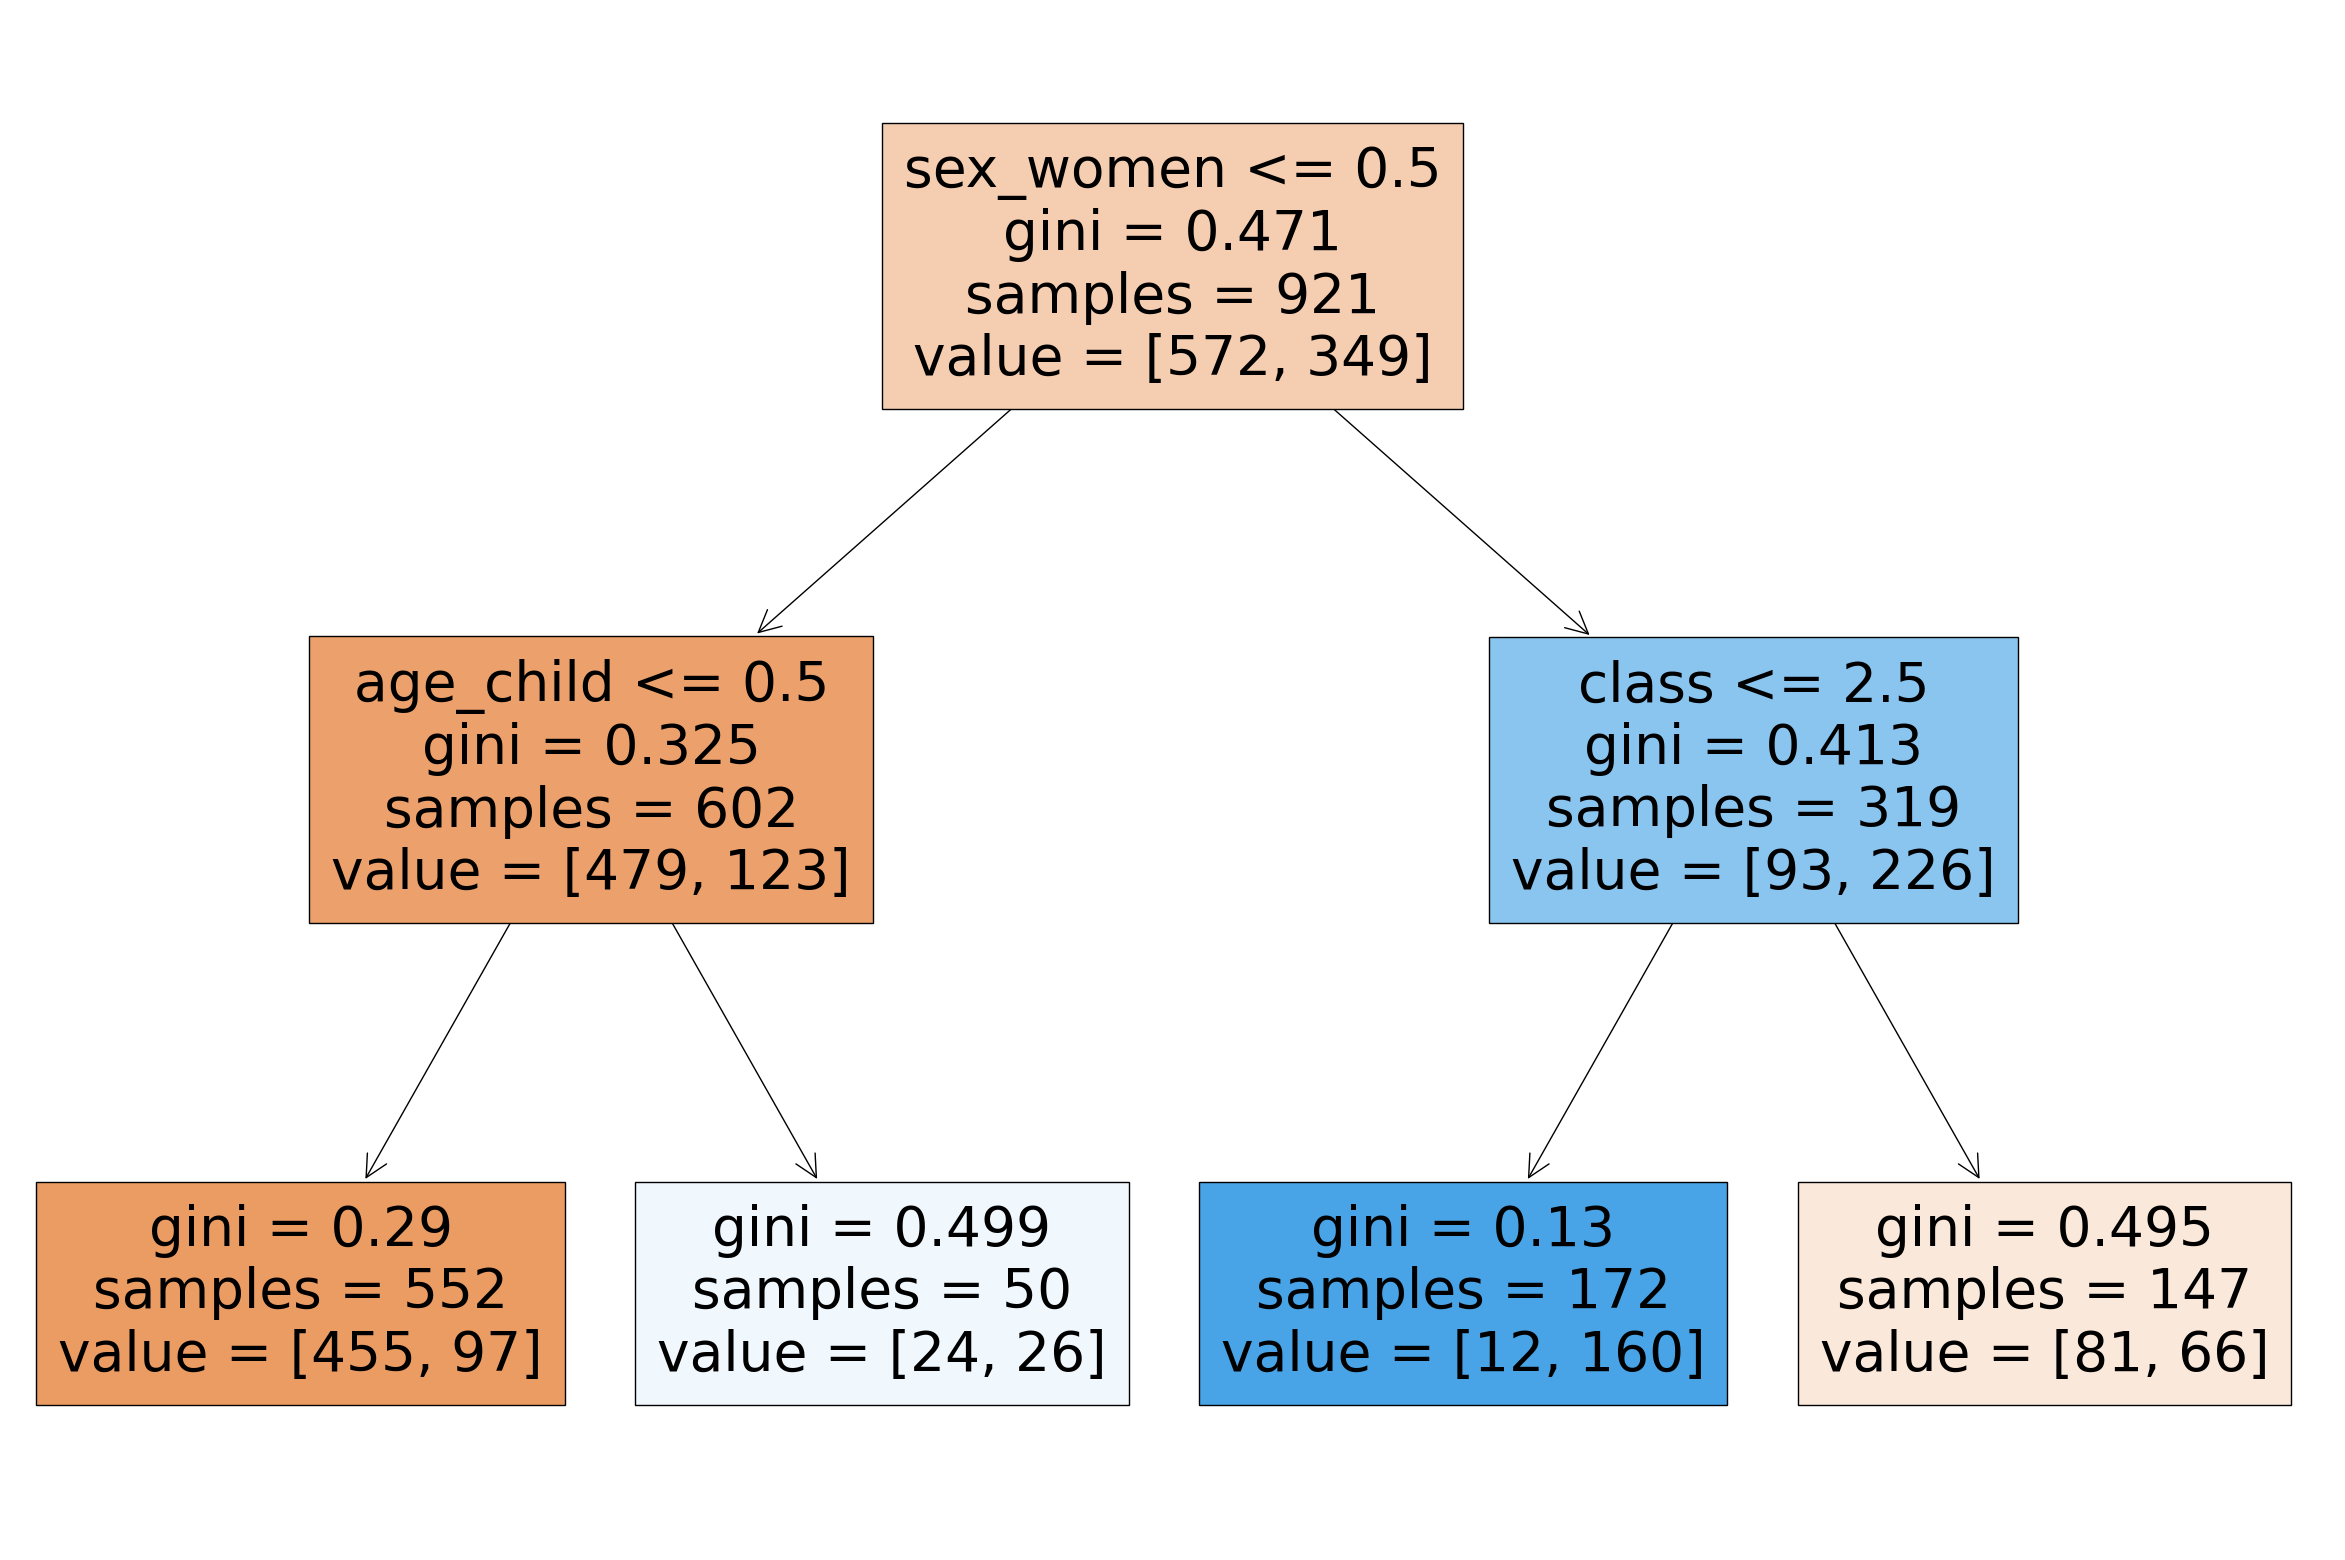

In [30]:
# Visualize the simple decicion tree
# Import the 'tree' module from the package 'sklearn'
from sklearn import tree
# Plot the tree structure using the 'plot_tree()' function
plt.figure(figsize = (30,20))
tree.plot_tree(simple_tree, feature_names = Xo_train.columns, filled = True)
plt.show()

The first split checks whether sex_woman <= 0.5 is true (go left) or false (go right). This means that males (sex_woman = 0) go to the left of the tree and females (sex_woman = 1) go to the right of the tree.

The next split on the left side of the tree checks whether age_child <= 0.5 is true (go left) or false (go right). This means that male adults (age_child = 0) go to the left of the node and male children (age_child = 1) go to the right of the node. The leftmost bottom node therefore collects all 552 male adults in our data of which 455 did not survive and 97 did. We therefore predict that male adults have a survival probability of 97/552, approximately equal to 18%. The same reasoning allows us to conclude that male children have a survival probability of 26/50 or 52%.

Following the same process on the right side of the tree therefore shows four possible survival probabilities:
- IF man \& adult THEN 18\%
- IF man \& child THEN 52\%
- IF woman \& 1st or 2nd class THEN 93\%
- IF woman \& 3rd class THEN 45\%

We can also assess each feature's predictive power by calculating the so-called feature importance metric. Below we show how 'sex' explains 69% of the predictive power, 'class' 24% and 'age' only 7%. For this tree this is not super informative, but this measure becomes really helpful when working with big complex black box models.

In [31]:
# Inspect feature importance values
pd.DataFrame(data = simple_tree.feature_importances_,
             index = Xo_train.columns,
             columns = ['importance']).sort_values('importance', ascending = False)

,importance
sex_women,0.690166
class,0.239066
age_child,0.070768


### Optimal regression tree

Let's now fit a slightly more complicated decision tree. We allow the tree to take a maximum depth of 10 and will search for the optimal tree depth. How do we do that? This is where the **validation** data comes in. We use part of the training data to evaluate all depth options and choose the depth that leads to the best performance. For now we define performance as the classification **accuracy** but we come back to this later. *Sidenote: we use a more complicated setup of cross-validation (instead of one simple train-validation split) which has some advantages, but the implementation details are not a priority here.*

In [32]:
# Perform cross-validation to assess different tree depth options
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

cv_grid = GridSearchCV(DecisionTreeClassifier(random_state = 1),
                       param_grid = {'max_depth':(1,2,3,4,5,6,7,8,9,10)},
                       scoring = make_scorer(accuracy_score, greater_is_better = True),
                       cv = 5, refit = True).fit(Xo_train, y_train)

Below we visualize the accuracy performance on our validation data for each tree depth. It is clear that accuracy improves from depth 1 to 2 and from depth 2 to 3. The accuracy stays constant for depths higher than 3 because of our small limited dataset. Typically this accuracy would drop after a while because the model starts overfitting. However, in our case, we can now safely choose a tree of depth 3 as optimal model.

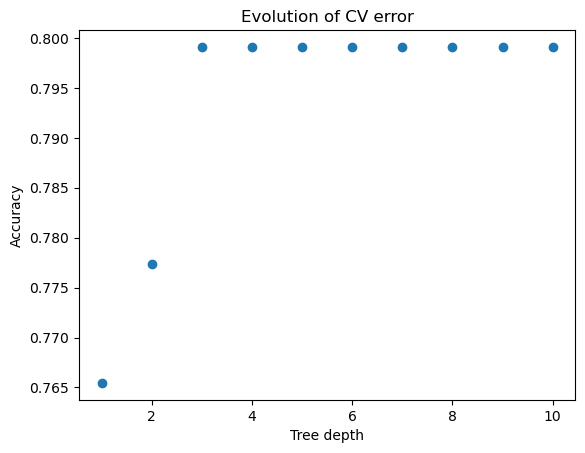

In [33]:
# Visualize the accuracy performance for each tree depth
plt.scatter(x = [1,2,3,4,5,6,7,8,9,10],
            y = cv_grid.cv_results_.get('mean_test_score'))
plt.title('Evolution of CV error')
plt.xlabel('Tree depth')
plt.ylabel('Accuracy')
plt.show()

The optimal tree of depth 3 is visualized below. The underlying decision process can be unraveled in the exact same way as before.

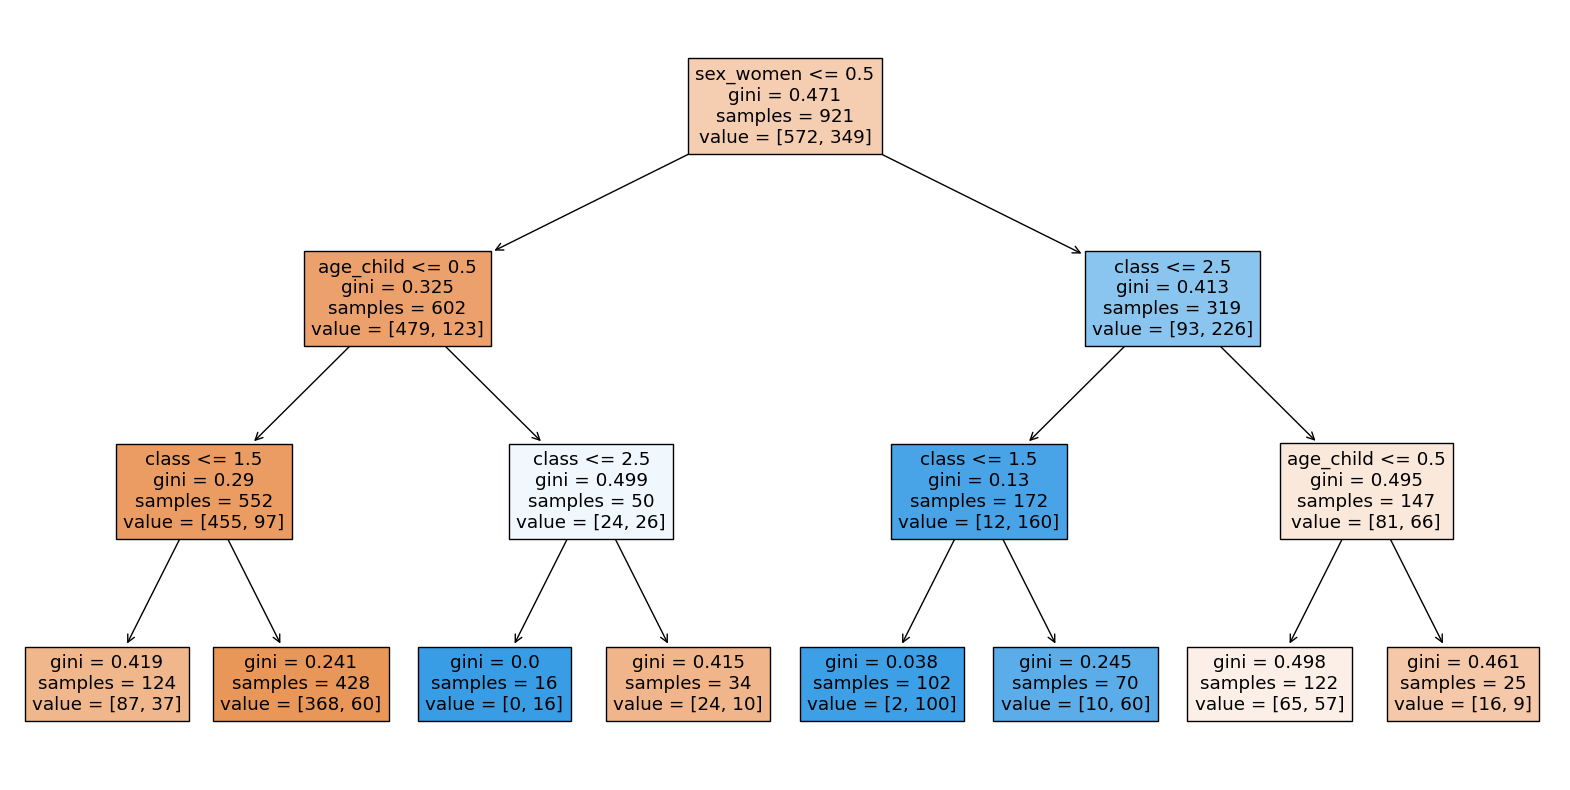

In [34]:
# Visualize the optimal decicion tree
plt.figure(figsize = (20,10))
best_tree = cv_grid.best_estimator_
tree.plot_tree(best_tree, feature_names = Xo_train.columns, filled = True)
plt.show()

This optimal tree shows eight possible survival probabilities:
- IF man \& adult & 1st class THEN 30\%
- IF man \& adult & not 1st class THEN 14\%
- IF man \& child & not 3rd class THEN 100\%
- IF man \& child & 3rd class THEN 29\%
- IF woman \& 1st class THEN 98\%
- IF woman \& 2nd class THEN 86\%
- IF woman \& 3rd class & child THEN 47\%
- IF woman \& 3rd class & adult THEN 36\%

The feature importance scores show that 'class' has gained some predictive performance in favor of 'sex' (which is still by far the most important feature).

In [35]:
# Inspect feature importance values
pd.DataFrame(data = best_tree.feature_importances_,
             index = Xo_train.columns,
             columns = ['importance']).sort_values('importance', ascending = False)

,importance
sex_women,0.619953
class,0.313688
age_child,0.066359


### Model comparison

We now have two models which we can compare, namely the logistic regression model and the optimal decision tree of depth 3. For both models we calculate the survival probabilities for each possible passenger profile. This allows us to spot differences in the underlying decision process of each model.

In [36]:
# Calculate the survival probabilities for each model
proba_tree = best_tree.predict_proba(Xo_train)[:,1]
proba_logr = log_reg.predict(sm.add_constant(Xd_train))

Below we show a scatterplot of the survival probabilities with those of the decision tree on the x-axis and those of the logistic regression on the y-axis. Each blue point is therefore plotted at the coordinates (tree prediction, logistic prediction) and the red line indicates locations where the tree and logistic predictions are equal. In total there are 12 (3 x 2 x 2) possible passenger profiles, each represented by a blue dot. Most blue points are situated around the red line, indicating that predictions are very similar in general. There are however some profiles where differences are substantial.

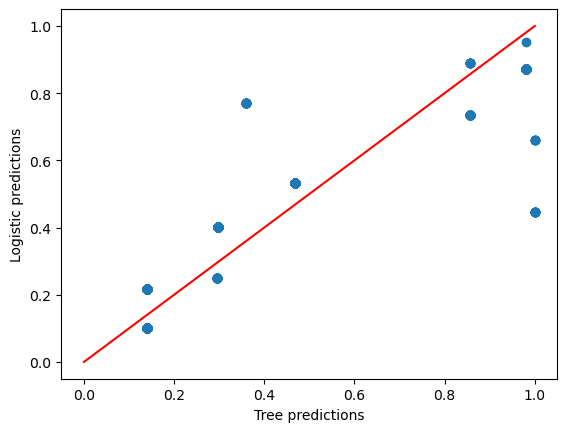

In [37]:
# Scatterplot of the probabilities
plt.scatter(proba_tree, proba_logr)
plt.plot([0,1], [0,1], 'r')
plt.xlabel('Tree predictions')
plt.ylabel('Logistic predictions')
plt.show()

The table below details those differences between the tree and logistic predictions for the 12 passenger profiles. We only highlight a couple:
- The tree assigns a survival probability of 14% to adult males in 2nd and 3rd class, while the logistic regression diversifies further (2nd class: 22% and 3rd class: 10%).
- The tree assigns a survival probability of 36% to female children in 3rd class, while the logistic regression estimates survival chances of 77%.
- The tree assigns a survival probability of 100% to male children in 1st and 2nd class, while the logistic regression predicts survival at only 66% and 45% respectively. This is because all these profiles in the training data survived the disaster, leading the decision tree to a very optimistic estimate.

This shows that there are some differences to be found between both models, so which one performs best?

In [38]:
# Profiles with predictions
Xo_train.assign(proba_tree = proba_tree, proba_logr = proba_logr).drop_duplicates().sort_values('proba_logr')

,age_child,sex_women,class,proba_tree,proba_logr
688,0,0,3,0.140187,0.101985
365,0,0,2,0.140187,0.217063
1274,1,0,3,0.294118,0.248881
50,0,0,1,0.298387,0.401387
592,1,0,2,1.000000,0.447174
1164,0,1,3,0.467213,0.533417
324,1,0,1,1.000000,0.661745
556,0,1,2,0.857143,0.736210
1294,1,1,3,0.360000,0.769349
287,0,1,1,0.980392,0.870967


### Model evaluation

Let's now evaluate these two models on the **test** data to assess the predictive generalization performance towards unseen data. We start by calculating the predicted survival classes (survived yes or no) on the test data.

In [39]:
# Calculate survival classes
class_tree = best_tree.predict(Xo_test)
class_logr = (log_reg.predict(sm.add_constant(Xd_test)) > 0.5).astype(int)

We now have the predicted survival class for each model on the test data and we know the actual observed target for the test data. Let's first calculate the **accuracy** for both models, defined as the number of correct classifications relative to all predictions: $accuracy = \frac{\# correct}{\# total}$. The difference in accuracy is very small, with the decision tree achieving 79.49% and the logistic regression 79.24%, indicating that both models perform similarly well.

In [40]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
print('Test accuracy decision tree:', accuracy_score(y_test, class_tree))
print('Test accuracy logistic regression:', accuracy_score(y_test, class_logr))
print('\nManual checks:')
print('DT: ', sum(y_test == class_tree) / len(y_test))
print('LR: ', sum(y_test == class_logr) / len(y_test))

Test accuracy decision tree: 0.7949367088607595
Test accuracy logistic regression: 0.7924050632911392

Manual checks:
DT:  0.7949367088607595
LR:  0.7924050632911392


Accuracy is however not always the best measure to use, especially when your target variable is highly skewed to mainly having either positive or negative classes. Our example contains a 60-40 distribution which is fairly balanced. But let's have a look at the **confusion matrix** which has the following format in scikit-learn with true/false (T/P) negatives/positives (N/P) respectively:

|        conf. |    matrix    |
| ------------- |-------------| 
| TN      | FP |
| FN      | TP      |  

From this we observe that the decision tree has more TNs while logistic regression has more TPs. Or in other words, the decision tree has more FNs while logistic regression has more FPs. The decision tree produces more negative predictions while logistic regression produces more positive predictions.

Which of these you should prefer depends on the use case at hand. What is more costly, predicting a positive case as negative or the other way around? Think about medical diagnosis where you really want to avoid a "no disease" prediction for someone who is sick because this will result in no treatment and possibly to the patient's death.

In [41]:
# Calculate confusion matrices
from sklearn.metrics import confusion_matrix
print('Confusion matrix decision tree:\n', confusion_matrix(y_test, class_tree))
print('Confusion matrix logistic regression:\n', confusion_matrix(y_test, class_logr))

Confusion matrix decision tree:
 [[240   5]
 [ 76  74]]
Confusion matrix logistic regression:
 [[215  30]
 [ 52  98]]


We can also visualize the confusion matrix to make the output more appealing to the human eye.

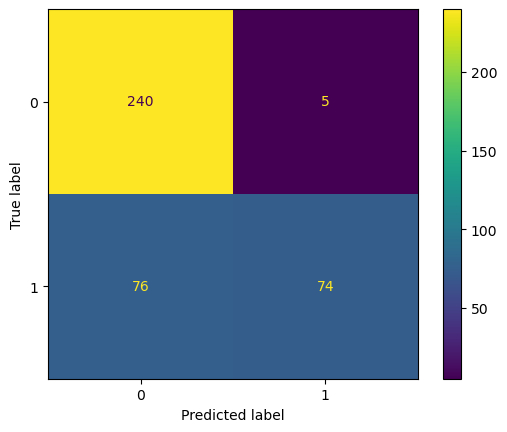

In [42]:
# Plot DT confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(best_tree, Xo_test, y_test) 
plt.show()

From the confusion matrix we can calculate several metrics:
- **recall**: proportion of correctly predicted positive instances among all positive instances, TP / (TP + FN)
- **precision**: proportion of correctly predicted positive instances among all instances predicted as positive, TP / (TP + FP)
- **F-score**: combines recall and precision in one number, 2 x (P x R) / (P + R)

The logistic regression model attains a higher recall, indicating that it is better at finding the positive cases. The decision tree attains a higher precision, indicating that such a positive prediction can be trusted more. The F-score prefers the logistic regression model over the decision tree.

In [43]:
# Calculate recall, precision and F-score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
print('Recall:\n')
print('DT:', recall_score(y_test, class_tree))
print('LR :', recall_score(y_test, class_logr))
print('\n')
print('Precision:\n')
print('DT:', precision_score(y_test, class_tree))
print('LR :', precision_score(y_test, class_logr))
print('\n')
print('F-score:\n')
print('DT:', f1_score(y_test, class_tree))
print('LR :', f1_score(y_test, class_logr))

Recall:

DT: 0.49333333333333335
LR : 0.6533333333333333


Precision:

DT: 0.9367088607594937
LR : 0.765625


F-score:

DT: 0.646288209606987
LR : 0.7050359712230216


This analysis shows that different metrics can prefer different models in the end, so it is important to clearly define your business goals in detail and align the proper metrics to optimize your AI solution.


## 4. Deployment & 5. Monitoring

Once you picked a model it is time to leave the data scientist's playground and put that model in production where it can start delivering actual business value. We discuss deployment and monitoring in modules 4 and 5 of the AI4Business course, so stay tuned!

![AI4Business](img/AI4Business.png)